## Problem Statement

BoomBikes, a prominent US-based bike-sharing company, has faced significant revenue losses due to the ongoing COVID-19 pandemic. With the current market conditions being highly challenging, the company is struggling to maintain its position. To overcome this setback, BoomBikes aims to devise a well-thought-out business strategy to quickly boost its revenue as soon as the lockdown restrictions are lifted, and the economy begins to recover.

Their primary objectives are:

1. To analyze the demand for shared bikes once the quarantine period is over by building a reliable linear regression model.  
2. To identify the key factors that influence their revenue, i.e., which variables play a crucial role in predicting bike demand.  
3. To evaluate the model's performance, ensuring it accurately explains the demand for shared bikes.  

With these insights, the company plans to position itself effectively to meet the expected surge in demand post-lockdown, differentiate itself from competitors, and maximize profits in the process.

*(For detailed attribute information, [click here](https://github.com/sanjay-barnwal/Bike-sharing-LR-assignment/blob/main/data_dictionary.txt).)*

## Step 1: Loading and Exploring the Data


### Begin by importing and reviewing the bike-sharing dataset to gain an initial understanding of the data.


### Read the data set

In [15]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [17]:
#Import packages for numerical and dataframe operations

import numpy as np
import pandas as pd

In [19]:
# Read the csv file into data frame

bike_df = pd.read_csv('https://raw.githubusercontent.com/sanjay-barnwal/Bike-sharing-LR-assignment/refs/heads/main/day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Analyze the overall Dataset

In [21]:
#Check the dimension of data set

bike_df.shape

(730, 16)

#### <font color = 'red'>Inferences:</font>
There are 730 rows and 16 columns in the data set.

In [23]:
#Check the meta data of data set

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### <font color = 'red'>Inferences:</font>
There are no null values so we dont need to remove or impute the null values

In [28]:
# Check the numerical summary of numerical columns of data set

bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### <font color = 'red'>Inferences:</font>
In the Bike Prediction dataset there are a total of 730 rows and 16 columns in which we need to use the 'cnt' column for the prediction purposes.

### Analyzing the data quality

In [32]:
# We already saw that there is no null values in any column through info functions. Lets reconfirm by calculating percentgae.
# percentage of missing values in each row

round(100*(bike_df.isnull().sum(axis=1)/len(bike_df)), 2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

In [34]:
# percentage of missing values in each colum

round(100*(bike_df.isnull().sum()/len(bike_df)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#### <font color = 'red'>Inferences:</font> 
There are no missing or null values and we dont need to clean the data with respect to null values

In [37]:
# Checking for duplicate rows

duplicates = bike_df.duplicated()
duplicates.sum()

0

#### <font color='red'>Inferences:</font> 
There are no duplicate rows present in the dataset

### Cleaning the data on the basis of business understanding

Based on an initial review of the dataset and the data dictionary, we can eliminate the following variables from further analysis:

- **instant**: This column serves as an index, and since we already have a default index, it can be removed.
- **casual & registered**: These columns represent the count of bikes booked by different customer categories. Since our objective is to find the total count of bikes booked, without distinguishing by category, we will exclude these columns.
- **dteday**: This column contains the date, but we already have separate columns for year and month. Therefore, it is not necessary for the analysis.

The updated DataFrame will be saved as `bike_df_cleaned`, ensuring that the original dataset remains preserved for any future analysis or validation.

In [42]:
#List the columns of cuurent data set

bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [44]:
# Remove the unnessary columns

bike_df_cleaned = bike_df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

# Display the meta of cleaned data set
bike_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


#### <font color='red'>Inferences:</font> 
None of the field has object data type which is good. There are some variables which are of numeric type but are categorical variables. We will look into those at a later point.

## Step 2: Visualizing the Data

In this step, we will create various visualizations to better understand the patterns and relationships within the dataset. Visualizing the data helps us gain insights into trends, distributions, and correlations that may not be immediately apparent from raw data alone.

#### Tasks for Visualization and Analysis

In this section, we will focus on the following tasks:

1. **Check for linear relationships**: We'll assess whether the variables are linearly related, which is crucial if we're planning to proceed with a linear model.
2. **Identify multicollinearity**: We will check for any multicollinearity between variables, as this can impact the accuracy and stability of our model.
3. **Examine correlations**: We'll look for strong associations between predictors and the outcome variable, which can help us identify the most important factors for prediction.
   
To accomplish this, we will visualize the data using **Matplotlib** and **Seaborn**, which will help us better understand the relationships within the dataset.


In [49]:
#Import the packages for creating visual representation and analyze the relationships 

import matplotlib.pyplot as plt
import seaborn as sns

Lets categorize the variables into Numeric Variables, Categorical Variables and Target Variable  to visualize the relationships.


In [51]:
numerical_variables = ['cnt', 'temp', 'atemp', 'hum','windspeed']
categorical_vars = ['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit', 'mnth']
target_variable = 'cnt'

#### Visualize numerical varaiables relationaship: using pairplot.

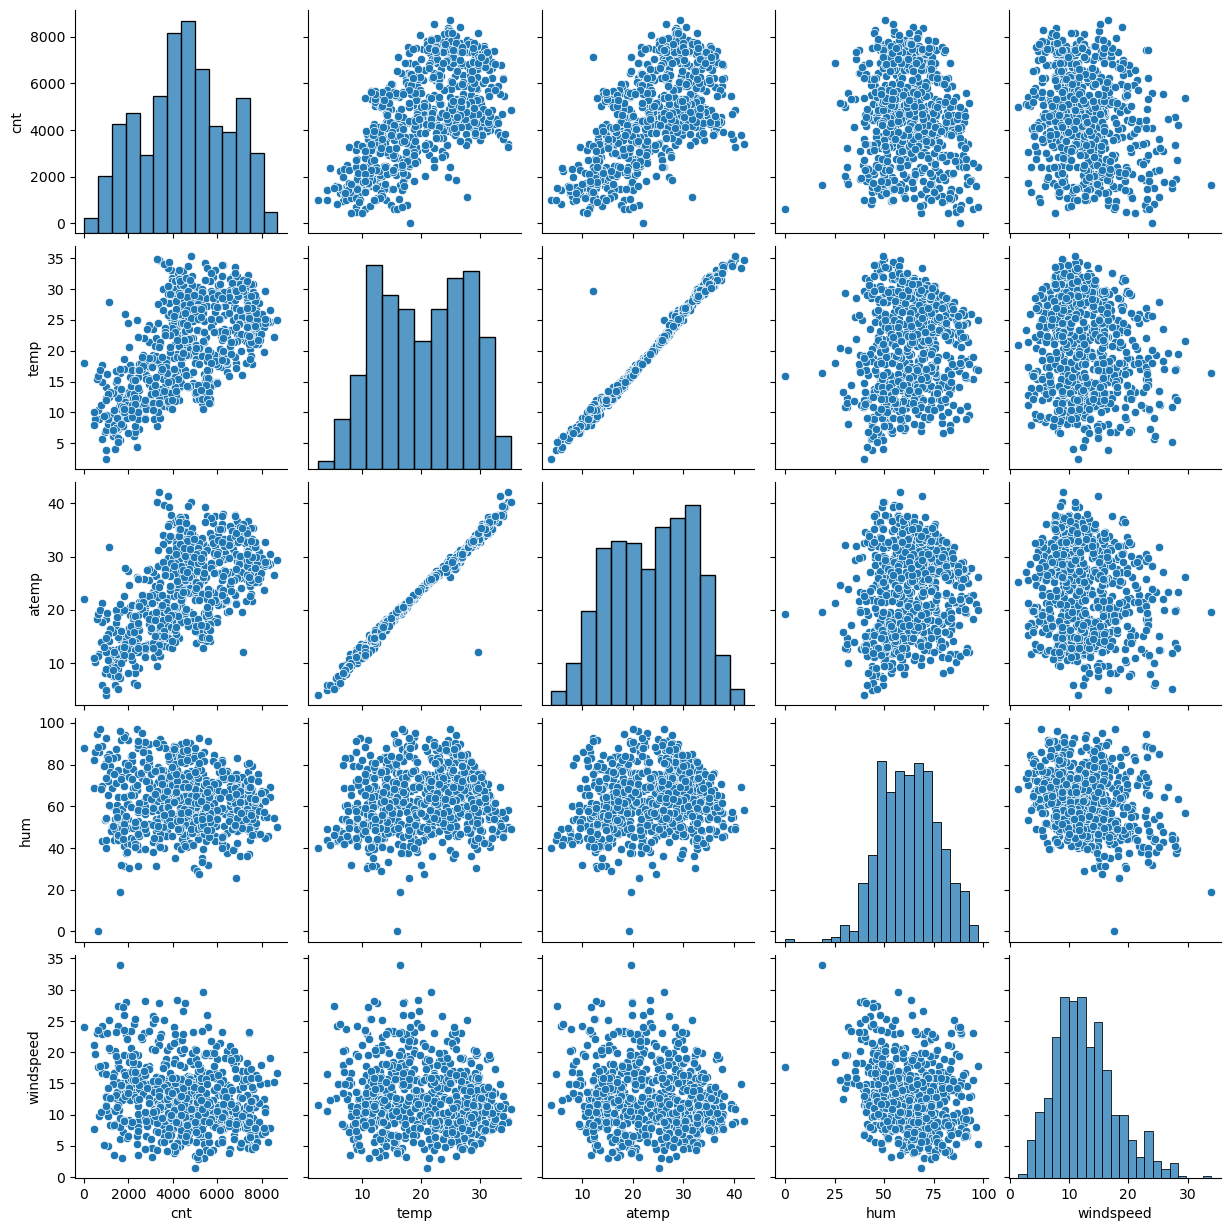

In [53]:
#Visualize numerical varaiables relationaship: using pairplot.

sns.pairplot(data=bike_df_cleaned, vars=numerical_variables)
plt.show()

#### <font color='red'> Inferences: </font>

From the visualizations of the numeric variables, we can observe that certain independent variables, such as **atemp** and **temp**, show a positive correlation with the target variable **cnt**. This suggests that a linear model could be a viable approach for the analysis, as some predictors appear to have a meaningful relationship with the outcome.


#### Visualize categorical varaiables relationaship with target variable cnt: using boxplot.

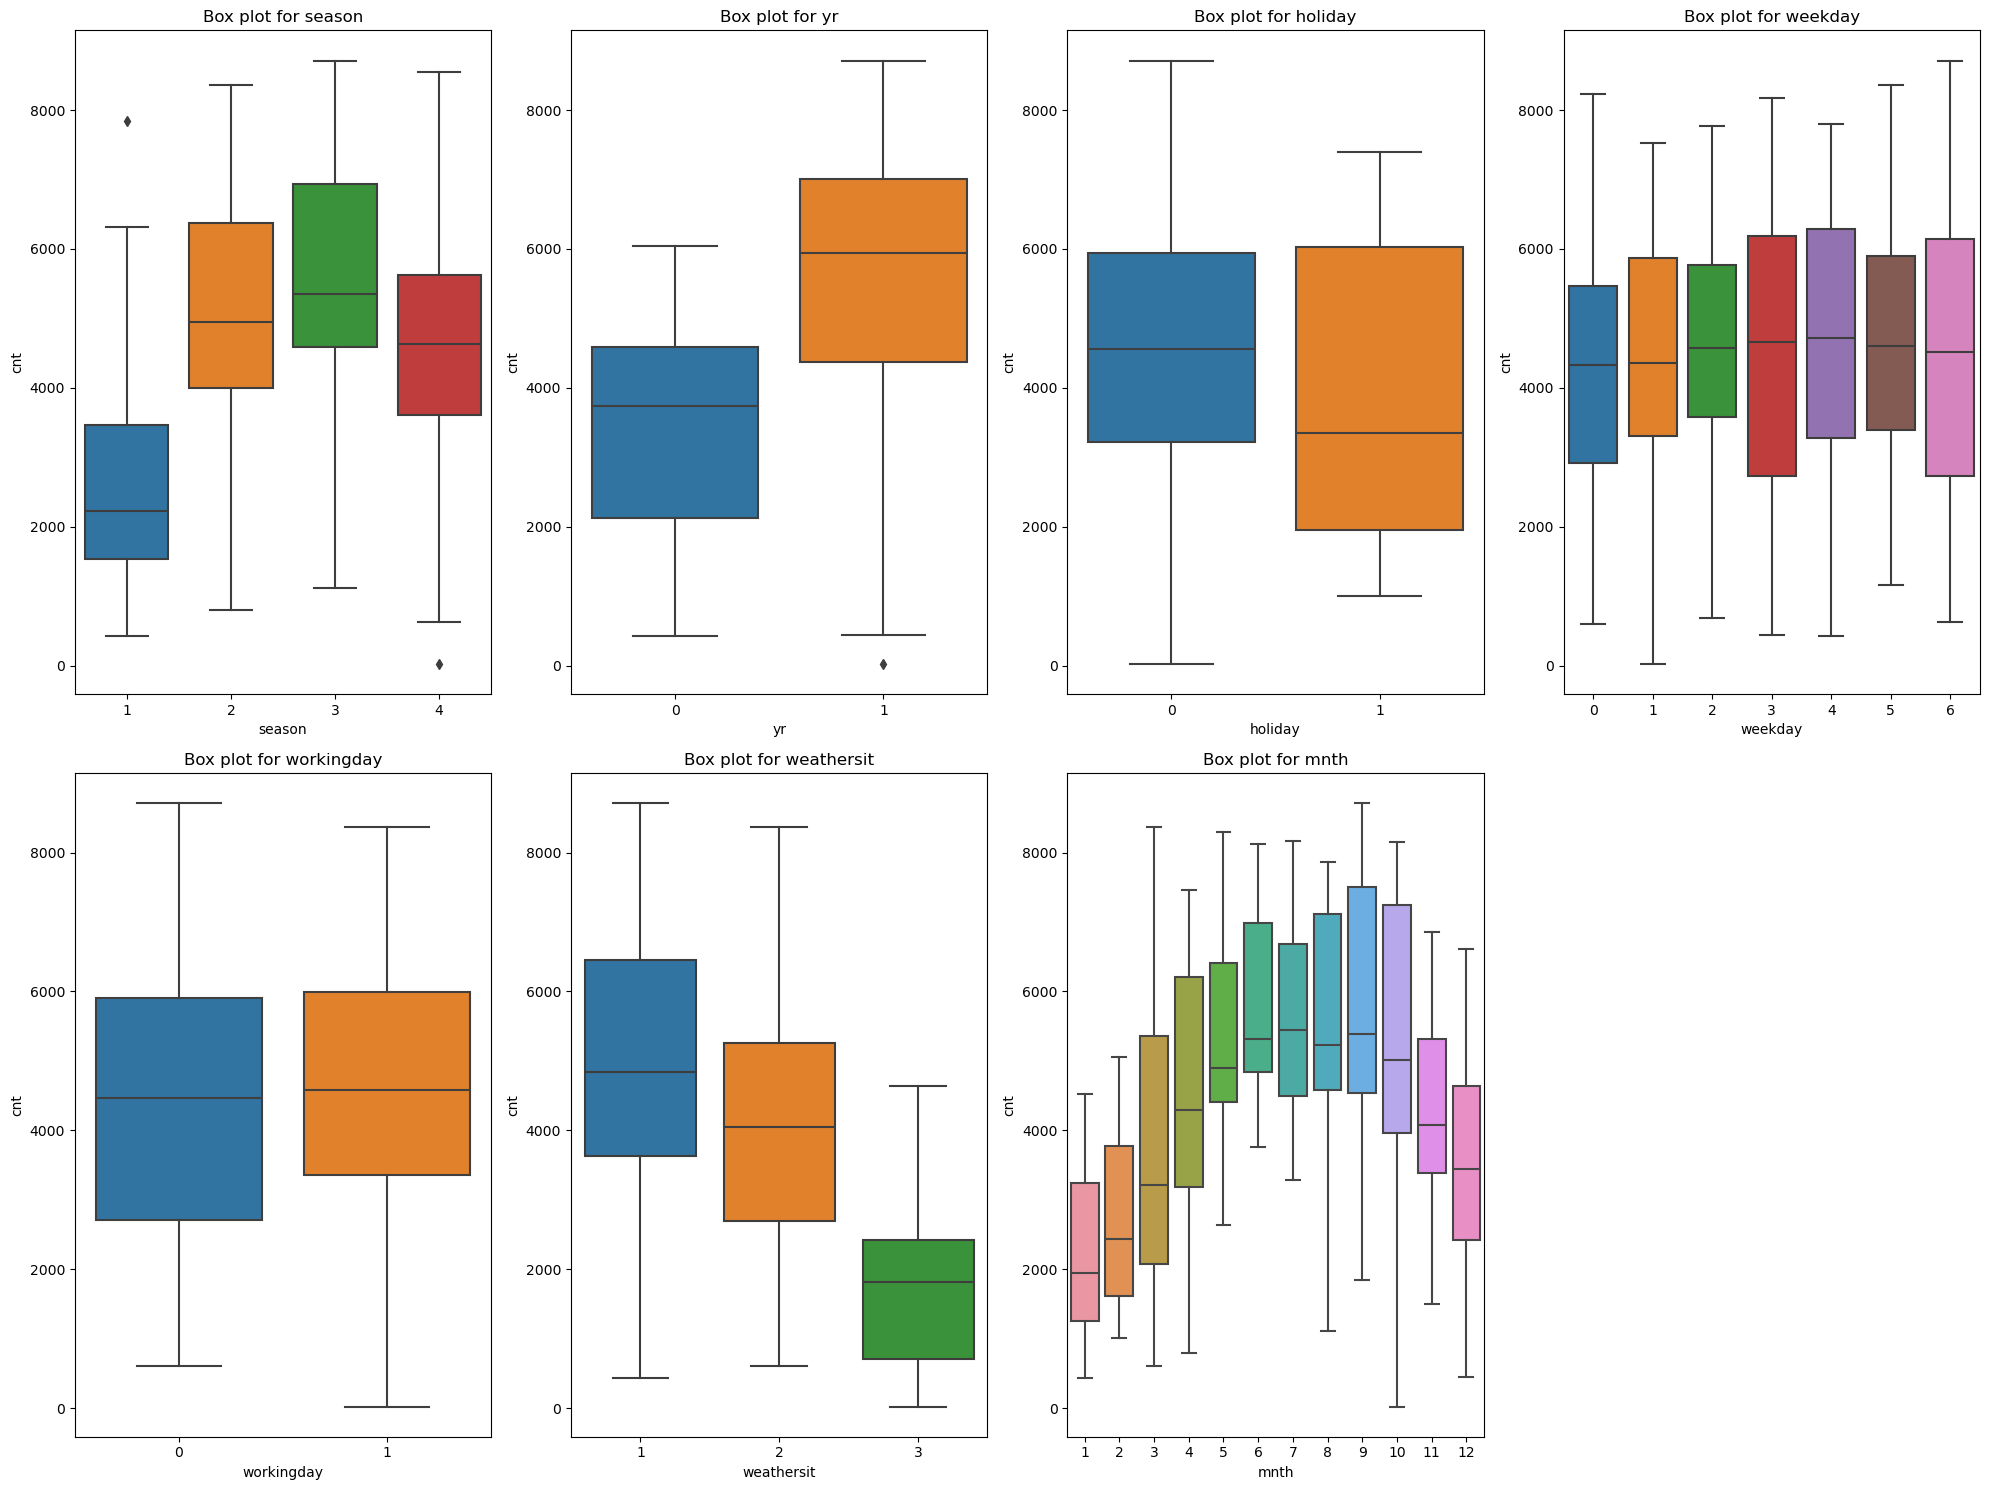

In [58]:
# Set up the figure size
plt.figure(figsize=(20, 15))

# Loop through the categorical variables to create box plots
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 4, i)  # Positioning the subplots in a 2x4 grid
    sns.boxplot(x=var, y='cnt', data=bike_df_cleaned)
    plt.title(f'Box plot for {var}')

# Display all the plots
plt.tight_layout()
plt.show()

#### <font color='red'> Inferences: </font>
The visualizations clearly highlight the qualitative distributions of the data. With the model identifying the important predictors, these graphs help us build more confidence in the model’s predictions.

- **Season**: The box plot for season shows that **Category 3: Fall** has the highest median, indicating the demand for rentals was highest during the fall season. On the other hand, **Category 1: Spring** had the lowest demand.
- **Year**: The count of rentals in **2019** was higher than in **2018**, suggesting that bike-sharing demand increased in the second year.
- **Weekdays**: The number of rentals is fairly consistent throughout the week, with no significant fluctuations observed between different days.
- **Weather**: It is clear that no rentals occur during **heavy rain or snow**, highlighting that these weather conditions have an adverse impact on bike usage. The highest rental counts were seen during **Clear** and **Partly Cloudy** weather.
- **Month**: Rentals peaked in **September**, whereas **December** showed a decline in rentals. This decline can likely be attributed to the typical heavy snowfall in December, which reduces bike usage.
- **Holidays**: There were fewer rentals during the **holidays**, suggesting that people may prefer not to use bike-sharing services during festive times.
- **Workingday**: The box plot for **Workingday** indicates that the number of bookings generally falls between 4000 and 6000. This suggests that there is little difference in bike rentals between working days and non-working days, as the median count remains fairly constant across both categories.
  

## Step 3: Preparing the data

In this step, we'll focus on preparing the data for modeling. This includes tasks such as encoding categorical variables, scaling numerical features, and splitting the dataset into training and testing sets. Proper data preparation is crucial as it helps ensure that the model performs optimally and can generalize well to unseen data.

Key actions in this step may include:
- **Feature encoding**: For any categorical variables, we will apply encoding techniques like one-hot encoding or label encoding to convert them into a format suitable for modeling.
-  **Splitting the data**: Finally, we will split the data into training and test sets, ensuring that the model is trained on one portion of the data and validated on another to assess its performance.
- **Scaling**: Some models benefit from scaling numerical features to a common scale, so we may apply scaling techniques like Min-Max scaling or Standardization.


By the end of this step, we’ll have a dataset that’s ready to be fed into our machine learning model.

### Mapping Categorical Values to Their Respective Categories

In this step, we'll map the numerical categorical values to their respective string categories, based on the reference data dictionary. This step is crucial as it improves the interpretability of the data and makes it easier for us to understand the relationship between features and the target variable.

For example, variables like **season**, **weathersit**, and **weekday** are encoded as numeric values, but they represent actual categories like "Spring" or "Clear weather". We'll map these numerical values back to their respective string labels using the reference provided in the data dictionary.

### Example Mappings:
- **Season**: 
  - 1 = Spring
  - 2 = Summer
  - 3 = Fall
  - 4 = Winter
- **Weather Situation (weathersit)**: 
  - 1 = Clear
  - 2 = Misty
  - 3 = Light Rain
  - 4 = Heavy Rain / Snow
- **Day of the Week (weekday)**: 
  - 0 = Sunday
  - 1 = Monday
  - 2 = Tuesday
  - 3 = Wednesday
  - 4 = Thursday
  - 5 = Friday
  - 6 = Saturday

By converting these numerical codes to more meaningful string labels, we can gain better insights when visualizing and analyzing the data.


In [62]:
import calendar
bike_df_cleaned['mnth'] = bike_df_cleaned['mnth'].apply(lambda x: calendar.month_abbr[x])

In [63]:
# Maping seasons

bike_df_cleaned.season = bike_df_cleaned.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

In [64]:
# Mapping weathersit
bike_df_cleaned.weathersit = bike_df_cleaned.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [65]:
#Mapping Weekday

bike_df_cleaned.weekday = bike_df_cleaned.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [66]:
# Lets see the data set now

bike_df_cleaned.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Converting Categorical Variables to Dummy Variables

The categorical variables **mnth**, **weekday**, **season**, and **weathersit** consist of multiple levels. For example, **weathersit** has 3 levels, and **mnth** has 12, each representing different months of the year. To make these variables usable in machine learning models, we need to transform them into a format that the model can process.

To achieve this, we’ll create **dummy variables** for these categorical features. Dummy variables are binary columns (0 or 1) that represent each category level, allowing the model to understand and handle these variables effectively.

We will create dummy variables for the following columns:
- **mnth**: Representing the 12 months of the year.
- **weekday**: Representing the 7 days of the week.
- **season**: Representing the 4 seasons.
- **weathersit**: Representing different weather conditions.

This step is essential as it enables the model to work with categorical data in a way that can improve prediction accuracy.


In [68]:
# Creating dummy variables for the specified categorical features

dummy = pd.get_dummies(bike_df_cleaned[['season', 'mnth', 'weekday', 'weathersit']], drop_first=True)
# Converting any boolean columns in dummy variables to integers
dummy = dummy.astype(int)

In [69]:
# Adding the dummy variables to the original dataset

bike_df_cleaned = pd.concat([dummy,bike_df_cleaned],axis = 1)

In [70]:
#Deleting the orginal columns season, weathersit, weekday, mnth

bike_df_cleaned.drop(['season', 'weathersit', 'weekday', 'mnth'],axis=1,inplace=True)

bike_df_cleaned.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [71]:
#Checking the dimension

bike_df_cleaned.shape

(730, 30)

In [72]:
#Checking the meta dat

bike_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 730 non-null    int64  
 1   season_Summer                 730 non-null    int64  
 2   season_Winter                 730 non-null    int64  
 3   mnth_Aug                      730 non-null    int64  
 4   mnth_Dec                      730 non-null    int64  
 5   mnth_Feb                      730 non-null    int64  
 6   mnth_Jan                      730 non-null    int64  
 7   mnth_Jul                      730 non-null    int64  
 8   mnth_Jun                      730 non-null    int64  
 9   mnth_Mar                      730 non-null    int64  
 10  mnth_May                      730 non-null    int64  
 11  mnth_Nov                      730 non-null    int64  
 12  mnth_Oct                      730 non-null    int64  
 13  mnth_

### Splitting the Data into Training and Testing Sets

The first step in building a regression model is to split the dataset into **training** and **testing** sets. This ensures that we can train the model on one portion of the data and then evaluate its performance on a separate, unseen portion.

We’ll use the **train_test_split** function from `sklearn.model_selection` to randomly split the data, which will help in assessing the model’s ability to generalize. Typically, we split the data with an 80-20 or 70-30 ratio, with 80% or 70% of the data used for training and the remaining portion used for testing.

Here’s how we’ll proceed:
- We'll define the features (independent variables) and the target variable (dependent variable).
- We'll then split the data into training and testing sets.

Let’s move forward with this train-test split.

In [74]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
train, test = train_test_split(
    bike_df_cleaned, 
    train_size=0.7,              # 70% data for training
    random_state=100             # For reproducibility
)

# Displaying the shape of the resulting datasets
print(f"Training DataFrame Shape: {train.shape}")
print(f"Testing DataFrame Shape: {test.shape}")


# Separate features (X) and target (y) for both train and test sets
X_train = train.drop('cnt', axis=1)  # Features for training set
y_train = train['cnt']               # Target variable for training set

X_test = test.drop('cnt', axis=1)    # Features for testing set
y_test = test['cnt']                 # Target variable for testing set

print(f"Training DataFrame Shape for features: {X_train.shape}")
print(f"Testing DataFrame Shape for features: {X_test.shape}")

print(f"Training DataFrame Shape for target: {y_train.shape}")
print(f"Testing DataFrame Shape for target: {y_test.shape}")


Training DataFrame Shape: (510, 30)
Testing DataFrame Shape: (220, 30)
Training DataFrame Shape for features: (510, 29)
Testing DataFrame Shape for features: (220, 29)
Training DataFrame Shape for target: (510,)
Testing DataFrame Shape for target: (220,)


### Rescaling the Features

While scaling may not significantly affect simple linear regression models, it becomes crucial in multiple linear regression due to varying feature scales. For example, the target variable **cnt** has much higher values compared to features like **temp**, **atemp**, etc. This difference in scale can cause certain coefficients to be disproportionately large or small when fitting the regression model, leading to issues during model evaluation.

To avoid this problem, it's essential to **rescale** the features so they are on a comparable scale. Without comparable scales, the model's coefficients could be misleading or hard to interpret. Standardization or normalization helps in achieving this uniformity.

There are two common techniques for rescaling features:

- **Min-Max Scaling**: Rescales the data to a fixed range, usually [0, 1].
- **Standardization (Z-score normalization)**: Transforms the data to have a mean of 0 and a standard deviation of 1.

In this case, we’ll apply **Min-Max Scaling** to ensure that all the features are on the same scale, which helps improve the performance of our multiple linear regression model.


In [76]:
from sklearn.preprocessing import MinMaxScaler

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'dummy' variables.
num_vars = ['hum','windspeed','temp','atemp']

# Fit the scaler on the training data and transform both the training and testing features

# Apply scaling only to numeric variables for the training set
X_train_scaled = X_train.copy()  # Create a copy to preserve the original
X_train_scaled[num_vars] = scaler.fit_transform(X_train_scaled[num_vars])


# Apply scaling only to numeric variables for the testing set
X_test_scaled = X_test.copy()  # Create a copy to preserve the original
X_test_scaled[num_vars] = scaler.transform(X_test_scaled[num_vars])

# Displaying the scaled features
print("Scaled Training Data:")
print(X_train_scaled.head())

print("Scaled Testing Data:")
print(X_test_scaled.head())



Scaled Training Data:
     season_Spring  season_Summer  season_Winter  mnth_Aug  mnth_Dec  \
576              0              0              0         0         0   
426              1              0              0         0         0   
728              1              0              0         0         1   
482              0              1              0         0         0   
111              0              1              0         0         0   

     mnth_Feb  mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  ...  weekday_Wednesday  \
576         0         0         1         0         0  ...                  0   
426         0         0         0         0         1  ...                  0   
728         0         0         0         0         0  ...                  0   
482         0         0         0         0         0  ...                  0   
111         0         0         0         0         0  ...                  0   

     weathersit_Light Snow & Rain  weathersit_Mist & Cloud

In [77]:
#Display Trained data
X_train_scaled.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed
576,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686
426,1,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106
482,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475
111,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0.345824,0.318819,0.751824,0.380981


In [78]:
#Summarize the the train data
X_train_scaled.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,...,0.158824,0.029412,0.345098,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883
std,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,...,0.365870,0.169124,0.475867,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 4: Creating a linear model

#### Analyzing the coefficients to mark which variables are highly correlated

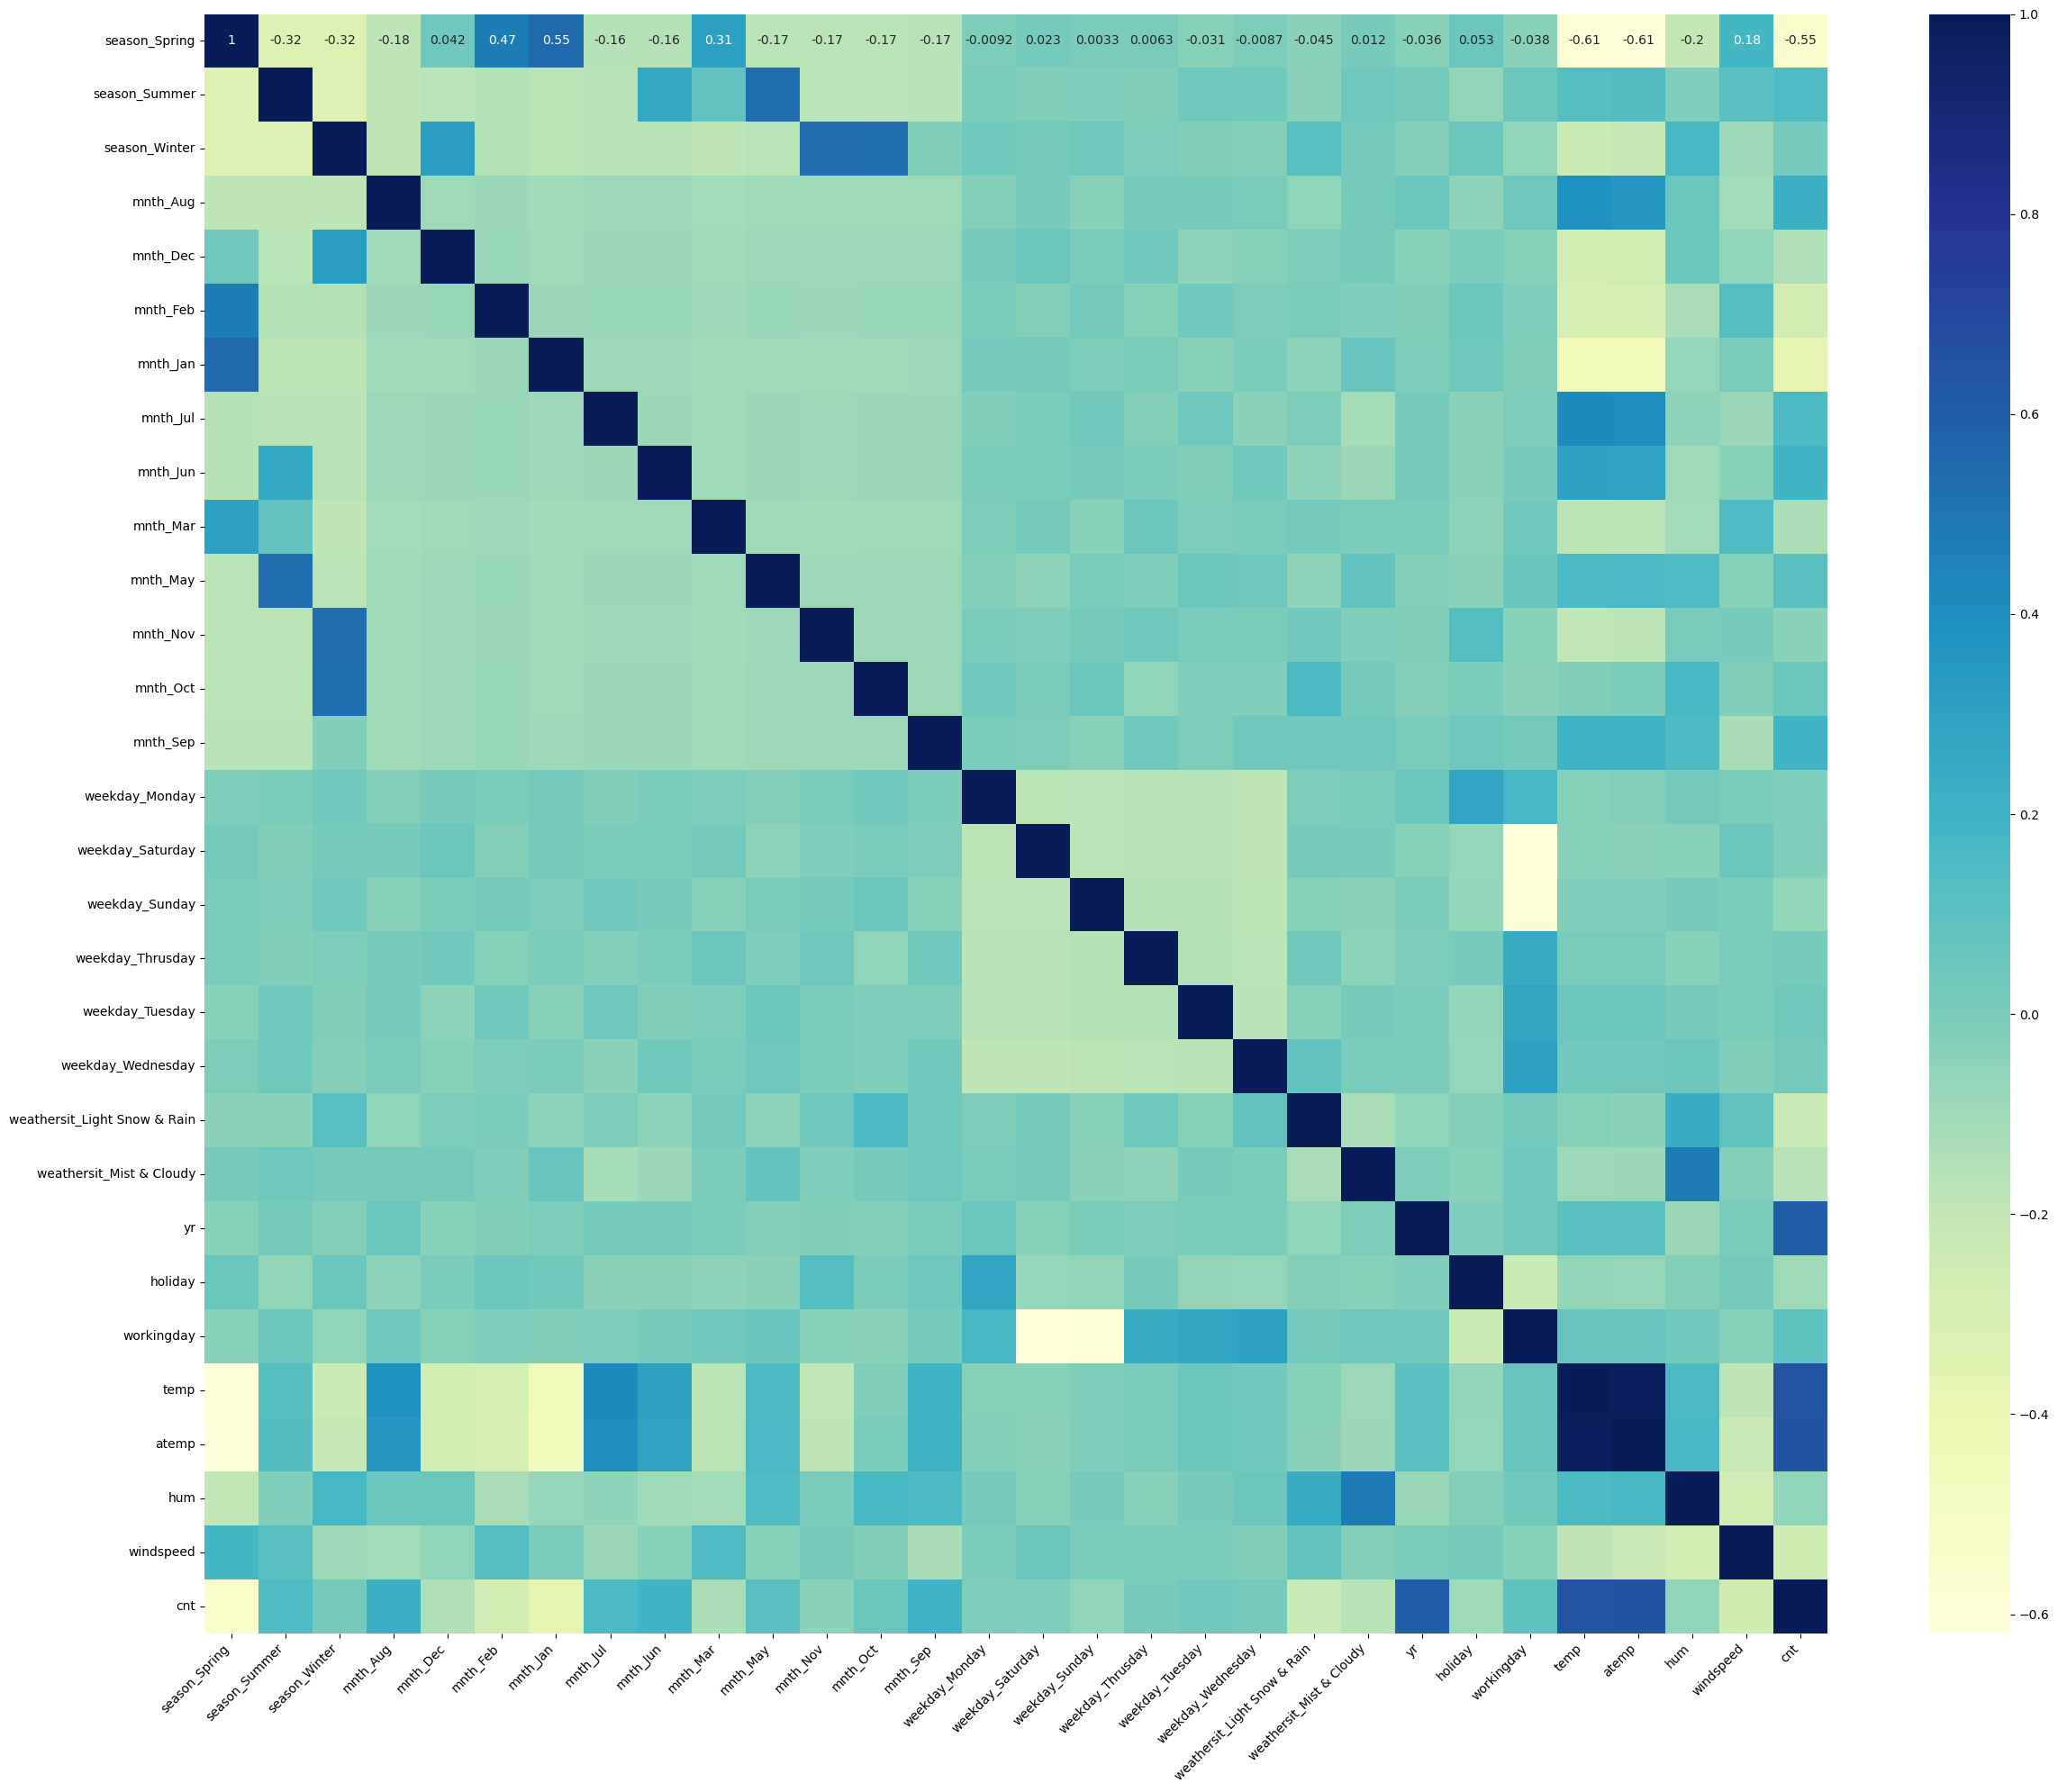

In [83]:
plt.figure(figsize=(25, 20))
sns.heatmap(train.corr(), annot=True, cmap="YlGnBu", annot_kws={"size": 10})
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

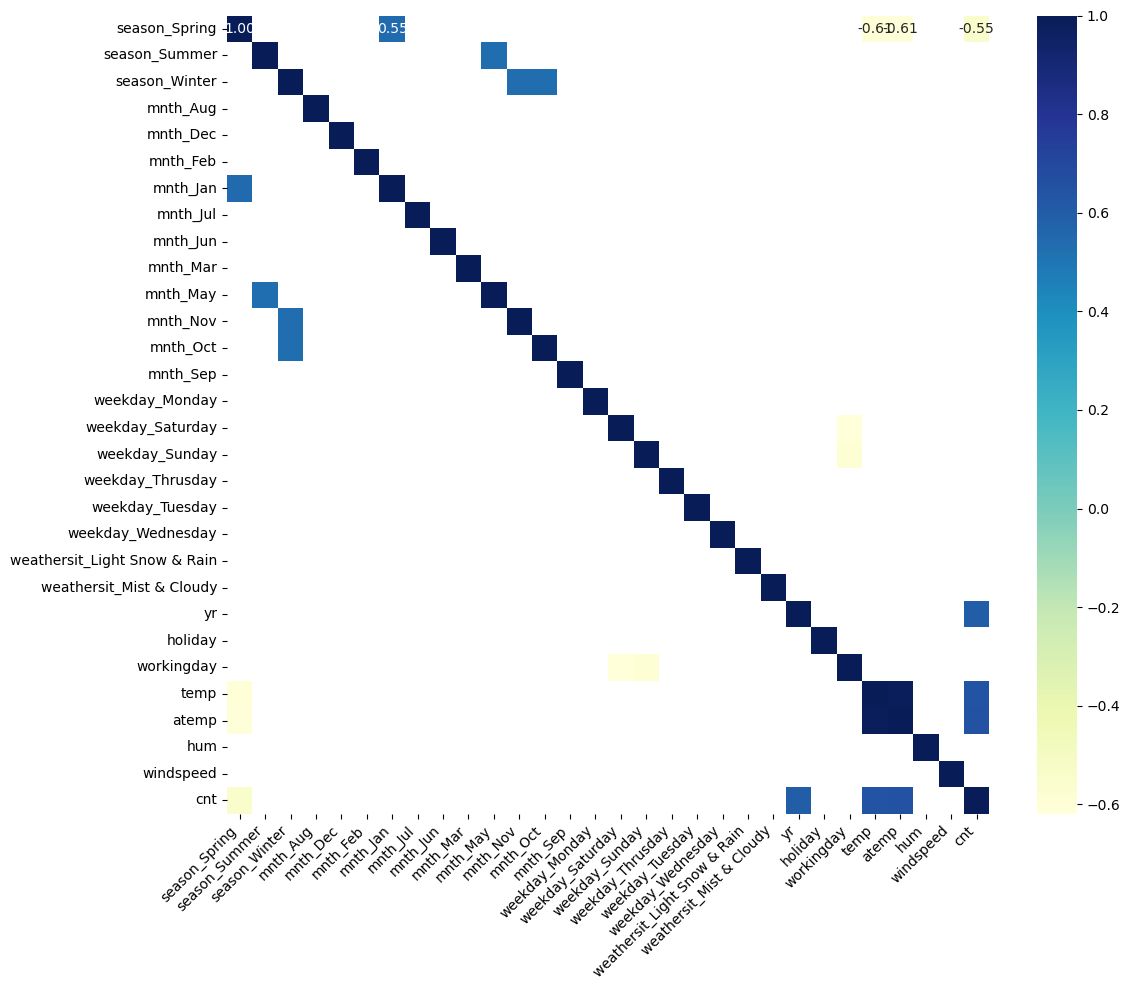

In [84]:
# Filter the correlation matrix
correlation_matrix = train.corr()
filtered_corr = correlation_matrix[(correlation_matrix >= 0.5) | (correlation_matrix <= -0.5)]

plt.figure(figsize=(12, 10))  # Adjust size for fewer variables
sns.heatmap(
    filtered_corr, 
    annot=True, 
    cmap="YlGnBu", 
    fmt=".2f", 
    annot_kws={"size": 10}
)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#### <font color = 'red'> Inference: </font>
Based on the heatmap, it is evident that atemp and temp exhibit a good correlation with the target variable cnt. While other independent variables do not show significant direct relationships, it would be prudent to include all columns in the model to comprehensively evaluate their influence.

### Approach Followed:
To develop the model, a combination of methodologies will be employed:

1. Feature Selection with RFE: The Recursive Feature Elimination (RFE) technique will help identify the most relevant predictors by systematically eliminating less important features.
2. Model Building with Statsmodels: Using the selected features, we will leverage the statsmodels library to construct and evaluate the linear regression model, ensuring statistical rigor and interpretability.

### Feature Selection Process

To begin, we will start with 15 variables. Using **Recursive Feature Elimination (RFE)**, we will systematically narrow down the features to the most significant ones. The process involves the following steps:

1. **LinearRegression from Scikit-Learn**: 
   - This function will act as the estimator for RFE since it is compatible with the feature selection utility.
   
2. **RFE**: 
   - RFE will rank features by their importance and eliminate the least significant ones in a recursive manner until the desired number of features is reached.

This approach ensures that only the most relevant predictors are retained for building the regression model.


In [103]:
# Step 1: Feature Selection using RFE

# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Initialize the Linear Regression model
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

# Initialize RFE with the Linear Regression model and the desired number of features
rfe = RFE(lm, n_features_to_select=15)  # Select 15 features for demonstration

# Fit RFE on the training data
rfe = rfe.fit(X_train_scaled, y_train)

# Step 2: Display the features selected by RFE
selected_features = X_train_scaled.columns[rfe.support_]
print("Selected Features:")
print(selected_features)

# Step 3: Display the ranking of features
feature_ranking = dict(zip(X_train_scaled.columns, rfe.ranking_))
print("\nFeature Rankings:")
print(feature_ranking)


Selected Features:
Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jul',
       'mnth_Oct', 'mnth_Sep', 'weekday_Saturday',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy', 'yr',
       'holiday', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

Feature Rankings:
{'season_Spring': 1, 'season_Summer': 1, 'season_Winter': 1, 'mnth_Aug': 3, 'mnth_Dec': 13, 'mnth_Feb': 11, 'mnth_Jan': 2, 'mnth_Jul': 1, 'mnth_Jun': 12, 'mnth_Mar': 6, 'mnth_May': 5, 'mnth_Nov': 15, 'mnth_Oct': 1, 'mnth_Sep': 1, 'weekday_Monday': 9, 'weekday_Saturday': 1, 'weekday_Sunday': 7, 'weekday_Thrusday': 10, 'weekday_Tuesday': 8, 'weekday_Wednesday': 14, 'weathersit_Light Snow & Rain': 1, 'weathersit_Mist & Cloudy': 1, 'yr': 1, 'holiday': 1, 'workingday': 1, 'temp': 1, 'atemp': 4, 'hum': 1, 'windspeed': 1}


In [104]:
#Features those needs to be eliminated
X_train_scaled.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'weekday_Monday', 'weekday_Sunday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday', 'atemp'],
      dtype='object')

### Building the Regression Model using Statsmodels

After performing feature selection, we will now build a linear regression model using **Statsmodels**. This method allows us to obtain detailed statistics such as p-values, R-squared, confidence intervals, and other metrics, which are helpful in understanding the relationship between the predictors and the target variable.

### Steps for Building the Model:
1. **Import Statsmodels**: We will use the `OLS` (Ordinary Least Squares) model from the **statsmodels** library.
2. **Fit the model**: Fit the regression model on the selected features.
3. **Evaluate the model**: Check the summary statistics of the model, including coefficients, p-values, and R-squared.


In [107]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train_scaled[selected_features]

#### Adding a constant variable 
For statsmodels, we need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [109]:
import statsmodels.api as sm

# Adding constant to the model for intercept
X_train_with_const = sm.add_constant(X_train_rfe)

# Fit the regression model
model = sm.OLS(y_train, X_train_with_const).fit()

# Display the summary statistics
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.2
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          3.47e-191
Time:                        01:19:10   Log-Likelihood:                -4105.9
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     494   BIC:                             8312.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#### <font color='red'>Inference:</font>

Based on the model summary, we observe that the **p-value** for all the variables is less than **0.05**, which indicates that all the predictors are statistically significant in explaining the variation in the target variable `cnt`. As a result, we will **retain all the columns** for further analysis.

Next, we will check the **Variance Inflation Factor (VIF)** to detect any multicollinearity between the predictors. High VIF values indicate that certain predictors are highly correlated with each other, which may lead to unstable coefficients in the model. 

The steps for calculating VIF will help us identify and potentially remove multicollinear variables to improve the model's stability and interpretability.


### Checking VIF for multicollinearity

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

#### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [113]:
#Import library to calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [117]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
13,hum,28.60
12,temp,17.46
11,workingday,5.34
14,windspeed,4.72
0,season_Spring,4.25
2,season_Winter,4.06
1,season_Summer,2.85
8,weathersit_Mist & Cloudy,2.29
9,yr,2.09
6,weekday_Saturday,1.98


#### In general, we want the VIF to be less than 5. Features with higher VIF values indicate potential multicollinearity issues. A VIF above 5 or 10 suggests that the feature is highly correlated with other predictors and could lead to unstable coefficient estimates in the regression model.

In this case, the feature `hum` has a VIF of **28.60**, which is significantly higher than the acceptable threshold of 5. Therefore, to reduce multicollinearity and improve the model stability, we will drop the `hum` feature.




In [122]:
### Code to drop the `hum` feature:

# Dropping the 'hum' feature from the dataset
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)


#### Model Iteration

In [125]:
# Adding constant to the model for intercept
X_train_with_const = sm.add_constant(X_train_rfe)

# Fit the regression model
model = sm.OLS(y_train, X_train_with_const).fit()

# Display the summary statistics
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.1
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          2.89e-188
Time:                        01:19:11   Log-Likelihood:                -4115.6
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     495   BIC:                             8325.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [127]:
# Recalculate VIF after dropping the feature
vif = pd.DataFrame()
vif["Features"] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
12,temp,7.19
11,workingday,5.27
13,windspeed,4.65
0,season_Spring,2.49
2,season_Winter,2.48
1,season_Summer,2.34
9,yr,2.07
6,weekday_Saturday,1.97
4,mnth_Oct,1.61
3,mnth_Jul,1.60


#### <font color = 'red'> Inference : </font>

### Finalizing the Model

#### Inference:
Now, as we can observe, both the **VIFs** and **p-values** are within an acceptable range. This indicates that the multicollinearity has been minimized(VIF < 10), and all remaining predictors are statistically significant (p-value < 0.05).

#### Final Model:
We finalize the above as the final model, which will be used for future predictions.


In [130]:
# Displaying the summary of the final model
print(model.summary())

# Extracting coefficients for future use
final_coefficients = model.params
print("Final Model Coefficients:")
print(final_coefficients)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.1
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          2.89e-188
Time:                        01:19:12   Log-Likelihood:                -4115.6
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     495   BIC:                             8325.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

## Step 5: Residual Analysis of the train data

### Checking the Distribution of Error Terms

One of the critical assumptions of linear regression is that the error terms should be normally distributed. To verify this, we will plot a histogram of the residuals (error terms) and analyze its shape.

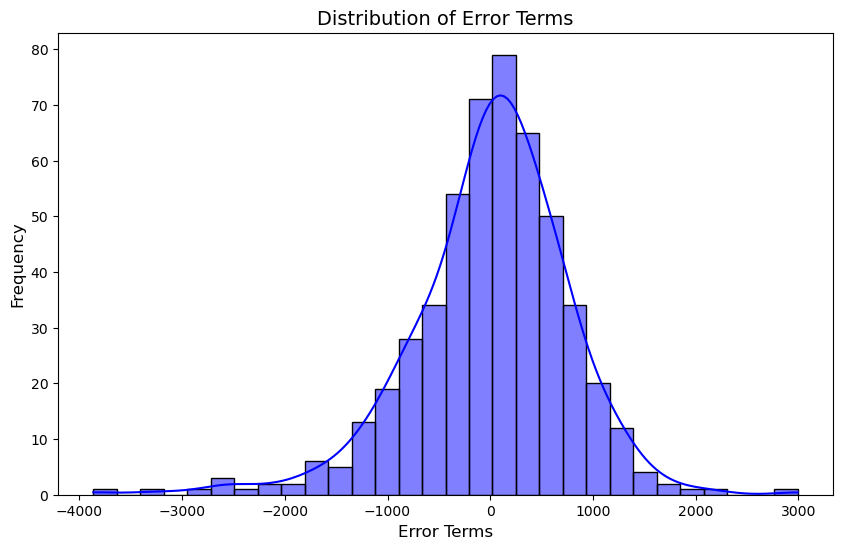

In [134]:
# Calculating the residuals
y_train_pred = model.predict(X_train_with_const)  # Predicted values
residuals = y_train - y_train_pred       # Error terms

# Plotting the histogram of the residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color="blue")
plt.title("Distribution of Error Terms", fontsize=14)
plt.xlabel("Error Terms", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

# Checking for normality visually

#### <font color = 'red'> Inference: </font>

From the histogram, if the error terms appear to follow a bell-shaped curve, it suggests that they are approximately normally distributed. This is crucial for validating the assumptions of the linear regression model.

#### Validating the Normality of Error Terms

To further validate the normal distribution of the error terms, we can visually inspect a Q-Q (Quantile-Quantile) plot. If the error terms follow a straight line on this plot, it strongly suggests that they are normally distributed.

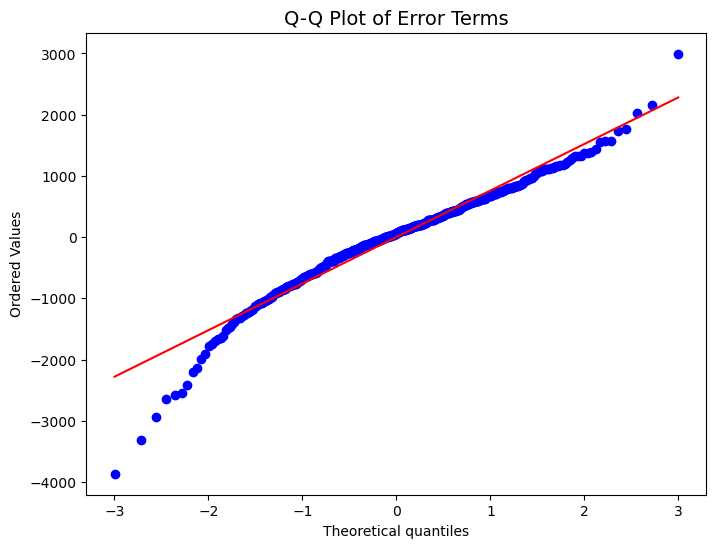

In [138]:
import scipy.stats as stats


# Generating the Q-Q plot for residuals
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Error Terms", fontsize=14)
plt.show()

#### <font color='red'>Inference:</font>
From the Q-Q plot, we observe that most of the data points align closely with the diagonal straight line. This observation reinforces the assumption that the error terms are normally distributed.

#### Validating the homoscedasticity of Error Terms

To check for homoscedasticity, we plot the residuals (errors) against the fitted values (predicted values) from the model. This allows us to visually inspect if the variance of the residuals remains constant across all levels of the fitted values.


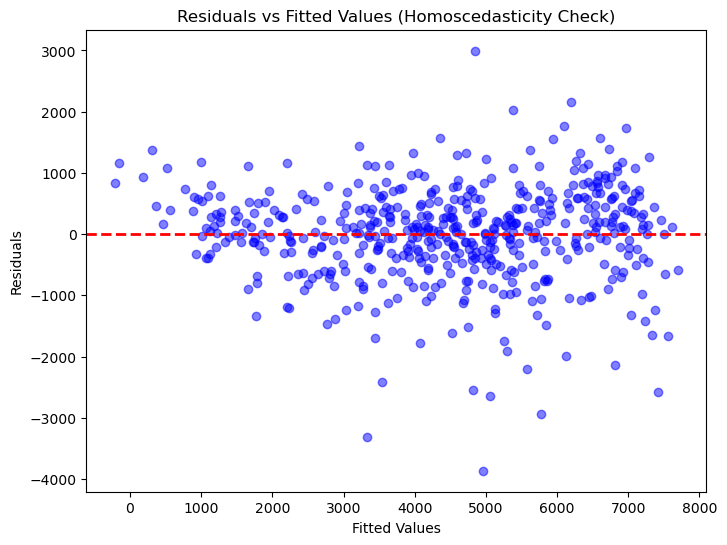

In [151]:
# Create the plot for homoscedasticity check
plt.figure(figsize=(8,6))
plt.scatter(y_train_pred, residuals, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title('Residuals vs Fitted Values (Homoscedasticity Check)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

#### <font color='red'>Inference:</font>
From the scatter plot, we observe that he residuals are randomly scattered around the horizontal axis (zero line), and there is no discernible pattern, it indicates that the variance of the residuals is constant, thus satisfying the homoscedasticity assumption.

## Step 6: Evaluating Model Predictions and Performance

We are now using the final regression model to predict bike rental counts (cnt) and evaluate its performance. The steps involve:

Predicting cnt values on the test dataset.
Assessing the model’s performance using R² and RMSE metrics to measure accuracy and reliability.

#### We have already applied scaling on test data set

In [1642]:
#Summarize test data set
X_test_scaled.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed
184,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0.831783,0.769660,0.657364,0.084219
535,0,1,0,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0.901354,0.842587,0.610133,0.153728
299,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0.511964,0.496145,0.837699,0.334206
221,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0.881625,0.795343,0.437098,0.339570
152,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0.817246,0.741471,0.314298,0.537414


In [1644]:
# Adding a constant to the test dataset
X_test_sm = sm.add_constant(X_test_scaled[X_train_rfe.columns])

# Using the final model to make predictions on the testing dataset
y_test_pred = model.predict(X_test_sm)

# Displaying the first few predictions
print("First few predictions:")
print(y_pred.head())

First few predictions:
184    3296.038965
535    6636.815042
299    3646.286910
221    4535.280128
152    3907.014718
dtype: float64


#### Assessing Model Performance
We are calculating performance metrics to understand how well the model generalizes to unseen data:

In [1647]:
from sklearn.metrics import r2_score, mean_squared_error
# Calculating the R² score for train data
r2 = r2_score(y_train, y_train_pred)

# Calculating the RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Displaying the performance metrics
print(f"R² Score for train data : {r2:.4f}")
print(f"Root Mean Squared Error (RMSE) for train data: {rmse:.4f}")

# Calculating the R² score for test data
r2 = r2_score(y_test, y_test_pred)

# Calculating the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Displaying the performance metrics
print(f"R² Score for train data : {r2:.4f}")
print(f"Root Mean Squared Error (RMSE) for train data: {rmse:.4f}")

R² Score for train data : 0.8424
Root Mean Squared Error (RMSE) for train data: 773.5249
R² Score for train data : 0.8149
Root Mean Squared Error (RMSE) for train data: 817.6130


#### <font color = 'red'> Inference: </font>

After evaluating the model's performance on both the training and testing datasets, we observe the following:

- **R² Score (Training Data):** 0.8424  
  This indicates that approximately **84.24%** of the variance in the bike rental count (`cnt`) is explained by the model on the training dataset.

- **Root Mean Squared Error (RMSE - Training Data):** 773.5249  
  The model's average prediction error is around **773.52 units** of bike rentals on the training dataset. A lower RMSE reflects good prediction accuracy.

- **R² Score (Testing Data):** 0.8149  
  About **81.49%** of the variance in the test data is explained by the model, demonstrating that the model generalizes well to unseen data.

- **Root Mean Squared Error (RMSE - Testing Data):** 817.6130  
  The RMSE for the test data is slightly higher than the training data, indicating that the model performs consistently across both datasets, with only a minor increase in error.

---

### Conclusion:
The model is performing well, with a strong balance between explaining variance (**R²**) and maintaining low error rates (**RMSE**) for both training and testing datasets. These results suggest that the model is robust and can be reliably used for predicting bike rental demand.


## Step 7: Model Evaluation

Plotting the graph for actual versus predicted values.

Text(0, 0.5, 'y_test_pred')

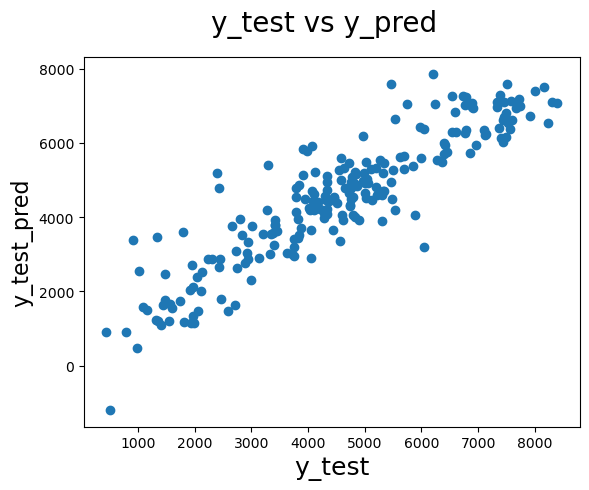

In [1652]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

#### <font color='red'>Inference:</font> 
Based on the R² and RMSE values, we can confidently conclude that the final model is not just a result of chance. The model demonstrates decent predictive power, with the R² score indicating that it explains a significant portion of the variance in bike rentals. The RMSE values show that the model's predictions are reasonably close to the actual values, both for the training and test datasets.

Thus, the model is reliable and can be used for future predictions of bike rentals, with reasonable accuracy and generalization to unseen data.

#### To get the variable names and their corresponding coefficient values for the final regression equation of the best-fitted line, you can extract the coefficients of the regression model.

In [1656]:
# Extracting coefficients for future use
final_coefficients = model.params
print("Final Model Coefficients:")
print(final_coefficients)

Final Model Coefficients:
const                           1482.047663
season_Spring                   -621.733748
season_Summer                    401.178082
season_Winter                    600.363076
mnth_Jul                        -409.339063
mnth_Oct                         298.866962
mnth_Sep                         690.780061
weekday_Saturday                 511.711302
weathersit_Light Snow & Rain   -2569.472989
weathersit_Mist & Cloudy        -720.918959
yr                              2036.473928
holiday                         -473.836667
workingday                       410.497305
temp                            4137.213976
windspeed                      -1310.882841
dtype: float64


### <font color='red'> Final Conclusions: </font>

Based on the scatter plot and the table of coefficients, we can derive the equation of our best-fitted regression line as:

$$ 
cnt = 1482.05 + (-621.73) \times \text{season\_Spring} + 401.18 \times \text{season\_Summer} + 600.36 \times \text{season\_Winter} \\
+ (-409.34) \times \text{mnth\_Jul} + 298.87 \times \text{mnth\_Oct} + 690.78 \times \text{mnth\_Sep} \\
+ 511.71 \times \text{weekday\_Saturday} + (-2569.47) \times \text{weathersit\_Light Snow \& Rain} \\
+ (-720.92) \times \text{weathersit\_Mist \& Cloudy} + 2036.47 \times \text{yr} \\
+ (-473.84) \times \text{holiday} + 410.50 \times \text{workingday} + 4137.21 \times \text{temp} \\
+ (-1310.88) \times \text{windspeed}
$$

#### Interpretation of Coefficients:
The regression equation provides a quantitative understanding of how each feature contributes to the prediction of bike rental demand (`cnt`)

- **Positive coefficients**, such as `yr` (year), `mnth_Sep` (September), `mnth_Oct` (October), `season_Summer`, `season_Winter`, `weekday_Saturday`, `workingday`, and `temp`, indicate that an increase in these variables is associated with a rise in bike demand (`cnt`).

- **Negative coefficients**, such as `season_Spring`, `mnth_Jul` (July), `weathersit_Light Snow & Rain`, `weathersit_Mist & Cloudy`, `holiday`, and `windspeed`, indicate that an increase in these variables is associated with a decrease in bike demand (`cnt`).



#### Model Performance:
- The **R-squared** and **Adjusted R-squared** values for both the training and testing datasets suggest that the model explains over **81%** of the variance in bike demand. This indicates a good fit for the data and reliable predictive power.
- The **coefficients** of the features provide valuable insights into the key factors that drive bike demand, highlighting which variables have the most significant impact.


#### Key Features Influencing Bike Demand:
Based on the final model, the top features that significantly influence bike demand are:

1. **Temperature (4137.21)**: The positive and large coefficient for `temp` highlights that higher temperatures strongly correlate with increased bike demand, indicating that warmer weather encourages more bike usage.

2. **Year (2036.47)**: The positive coefficient for `yr` suggests that bike demand has been steadily increasing over time, reflecting a growing popularity of bike rentals.

3. **Weather Conditions**:
   - **Light Snow & Rain (-2569.47)**: This has the most significant negative impact, indicating that such adverse weather conditions greatly reduce bike demand.
   - **Mist & Cloudy (-720.92)**: Although less severe than snow and rain, these weather conditions still negatively affect bike rentals.

4. **Seasonal Effects**:
   - **Season_Spring (-621.73)**: A negative coefficient suggests reduced bike demand in Spring compared to other seasons.
   - **Season_Winter (600.36)**: Conversely, Winter shows a positive correlation with bike demand, likely due to specific seasonal preferences or activities.

5. **Monthly Effects**:
   - **September (690.78)** and **October (298.87)**: These months show a positive correlation with higher bike demand.
   - **July (-409.34)**: In contrast, demand tends to drop in July.

6. **Other Influences**:
   - **Working Day (410.50)**: Working days are associated with increased bike demand, possibly due to commuting patterns.
   - **Holiday (-473.84)**: Holidays negatively impact demand, as bikes may not be the preferred mode of transport during leisure days.
   - **Windspeed (-1310.88)**: Higher wind speeds significantly reduce bike demand, likely due to the physical difficulty of riding in windy conditions.



#### Conclusion:
The analysis identifies **temperature**, **weather conditions**, **season**, and **year** as the most critical predictors of bike demand. While **positive coefficients** (e.g., `temp`, `yr`, `workingday`) highlight factors that boost demand, **negative coefficients** (e.g., `weathersit_Light Snow & Rain`, `season_Spring`, `holiday`) indicate elements that hinder bike rentals. 

Strategies for optimizing bike rentals should focus on capitalizing on favorable conditions (e.g., warmer weather, September/October) and mitigating the impact of adverse factors (e.g., weather, windspeed, holidays) through targeted promotions or service adjustments.


## <font color='red'> Final Recommendations to Optimize Bike Rental Services: </font>


Based on the analysis of the final model coefficients, here are the key recommendations to optimize the bike rental services:

### 1. Month-Specific Strategy

#### High Demand Months:
- The months of **September (690.78)** and **October (298.87)** show a positive correlation with bike demand. 
- The company should focus on **increasing fleet availability** and **marketing efforts** during these months to capture more customers, as they are likely to rent bikes more frequently.

#### Low Demand Months:
- Conversely, **July (-409.34)** shows a decline in demand. During these months, the company could consider **reducing fleet size** or introducing **promotional offers** to boost demand and attract customers.

---

### 2. Seasonal Considerations

#### Winter Season:
- The positive coefficient for **season_Winter (600.36)** indicates that bike demand tends to increase during Winter. 
- Despite colder weather, the company should **ensure bike availability** and **prepare for higher demand** by maintaining infrastructure and offering appropriate services, like warmer clothing or weather-resistant bikes, during winter months.

#### Spring and Summer:
- **Spring (-621.73)** and **Summer** (although the coefficient for Summer is positive, it may be lower than Winter or other seasons) are associated with reduced bike demand. 
- The company should **reassess strategies** during these seasons, possibly offering **seasonal promotions**, **discounted packages**, or targeting specific demographics that may be more likely to rent bikes, such as tourists or fitness enthusiasts.

---

### 3. Weather Conditions

#### Negative Impact of Adverse Weather:
- **Light Snow & Rain (-2569.47)** and **Mist & Cloudy (-720.92)** conditions significantly reduce bike demand. 
- The company should **monitor weather forecasts** closely and adapt its fleet size, adjusting the availability of bikes in real-time. Additionally, the company could consider offering alternative transportation modes, such as **electric bikes**, during bad weather, to maintain demand levels.

---

### 4. Temperature Influence

#### Positive Impact of Temperature:
- The positive coefficient for **temperature (4137.21)** indicates that warmer temperatures are strongly correlated with increased bike demand. 
- The company should **increase fleet availability** during hotter months and ensure that bikes are well-maintained for high usage. Marketing efforts should also be ramped up during these times to capture the increased demand for outdoor activities.

#### Heat-Driven Promotions:
- During particularly hot weather or heatwaves, the company could offer **cooling amenities**, such as water bottles or portable fans, to enhance the customer experience. 
- **Promotions** targeting customers seeking cooler, outdoor activities during high temperatures would also be effective.

---

### 5. Holiday Strategy

#### Holidays:
- The coefficient for **holiday (-473.84)** indicates a slight decline in bike demand during holidays. 
- While bike rentals may not be a priority for most people during holidays, the company can consider special **holiday promotions**, **themed events**, or **discounted rentals** to attract customers and encourage rentals during these periods.

---

### 6. Yearly Trends

#### Increasing Demand Over Time:
- The positive coefficient for **year (2036.47)** clearly indicates a growing trend in bike demand. 
- The company should prepare for **future growth** by **expanding the fleet**, **investing in infrastructure**, and **improving customer service** to accommodate the increasing demand over the coming years.

---

### 7. Windspeed and Safety Measures

#### Windspeed Impact:
- **Windspeed (-1310.88)** negatively affects bike rentals, especially in windy conditions. 
- The company should consider **adjusting operations in windier regions**, possibly offering **wind-resistant bikes**, emphasizing **safety measures**, or promoting other alternative transport options to ensure the safety of riders during windy weather.

---

### Key Takeaways for Optimization

By leveraging these insights, the company can make informed decisions to:
- **Optimize fleet management** by adjusting the fleet size based on weather, season, and month.
- **Tailor marketing strategies** to specific times of the year (e.g., focusing on September and October for promotions).
- **Adjust operational readiness** according to seasonal and weather-based trends to increase bike demand and customer satisfaction.
- **Address external factors** like wind, temperature, and weather to ensure customers feel safe and comfortable when renting bikes, ultimately improving rental rates during various conditions.



